**Import the necessary libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
import calendar

**Load the dataset**

In [ ]:
uber_data = pd.read_csv('/content/Uber_Drives.csv')
uber_data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


**Check for missing values**

In [ ]:
uber_data.isnull().any()

START_DATE*    False
END_DATE*       True
CATEGORY*       True
START*          True
STOP*           True
MILES*         False
PURPOSE*        True
dtype: bool

In [ ]:
uber_data.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [ ]:
uber_data = uber_data.dropna()
uber_data.isnull().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

In [ ]:
uber_data.dtypes

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

In [ ]:
uber_data.shape

(653, 13)

In [ ]:
uber_data['START_DATE*'] = pd.to_datetime(uber_data['START_DATE*'], format = '%m/%d/%Y %H:%M')
uber_data['END_DATE*'] = pd.to_datetime(uber_data['END_DATE*'], format = '%m/%d/%Y %H:%M')

In [ ]:
uber_data.dtypes

START_DATE*    datetime64[ns]
END_DATE*      datetime64[ns]
CATEGORY*              object
START*                 object
STOP*                  object
MILES*                float64
PURPOSE*               object
dtype: object

In [ ]:
hour = []
day = []
dayofweek = []
month = []
weekday = []

for entry in uber_data['START_DATE*']:
    hour.append(entry.hour)
    day.append(entry.day)
    dayofweek.append(entry.dayofweek)
    month.append(entry.month)
    weekday.append(calendar.day_name[dayofweek[-1]])

uber_data['HOUR'] = hour
uber_data['DAY'] = day
uber_data['DAY OF WEEK'] = dayofweek
uber_data['MONTH'] = month
uber_data['WEEKDAY'] = weekday

In [ ]:
uber_data.head()
uber_data.drop(columns = ['weekday'], axis =1)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY OF WEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,1,31,5,12,Saturday
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,13,31,5,12,Saturday
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,15,31,5,12,Saturday
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,21,31,5,12,Saturday


**Categories we have**

In [ ]:
uber_data['CATEGORY*'].value_counts()

Business    647
Personal      6
Name: CATEGORY*, dtype: int64

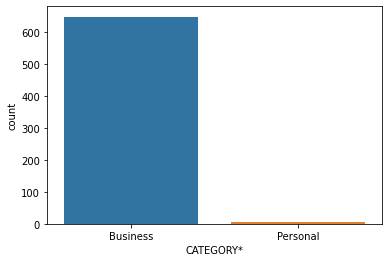

In [ ]:
sns.countplot(x = 'CATEGORY*',data = uber_data)

**How long do people travel with uber**

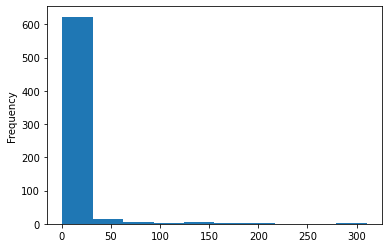

In [ ]:
uber_data['MILES*'].plot.hist()

**What hour do most people take uber to their destination?**

Text(0.5, 1.0, 'Number of Trips vs Hours')

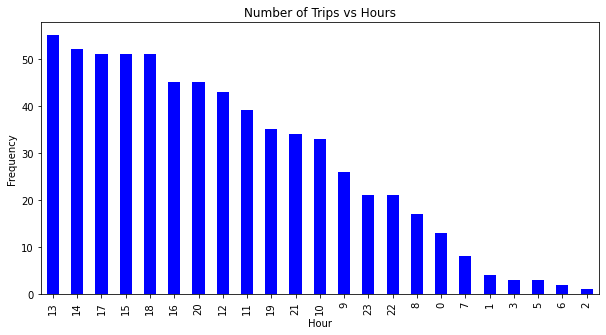

In [ ]:
uber_data['HOUR'].value_counts().plot(kind = 'bar',color = 'blue',figsize = (10,5))
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.title("Number of Trips vs Hours")

**Check the purpose of the trips**

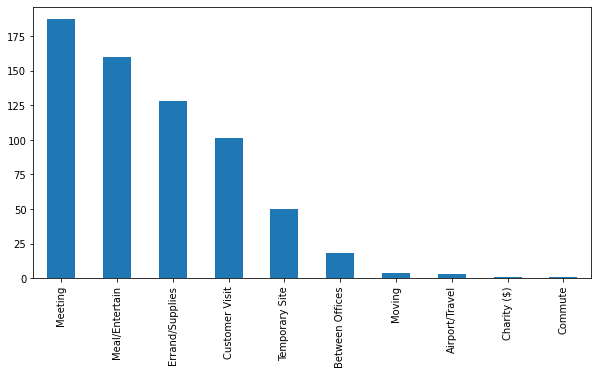

In [ ]:
uber_data['PURPOSE*'].value_counts().plot(kind = 'bar', figsize = (10,5))

**Which day has highest number of trips**

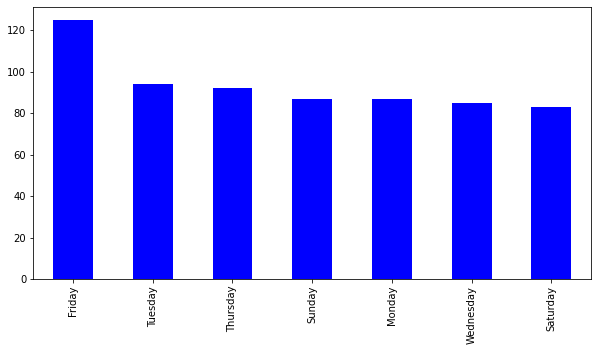

In [ ]:
uber_data['WEEKDAY'].value_counts().plot(kind = 'bar', figsize = (10,5), color = 'blue')

**What are the number of trips per each day**

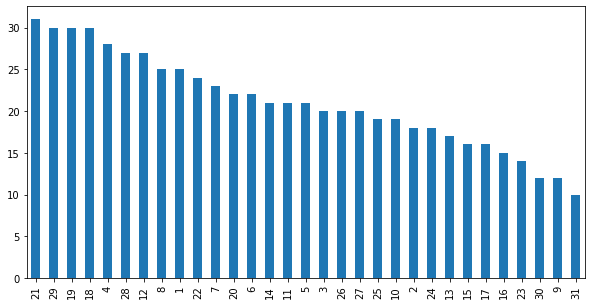

In [ ]:
uber_data['DAY'].value_counts().plot(kind = 'bar', figsize = (10,5))

**What are the trips in the month**

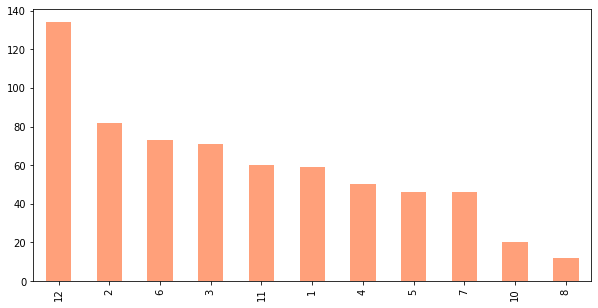

In [ ]:
uber_data['MONTH'].value_counts().plot(kind = 'bar', figsize = (10,5), color = 'lightsalmon')

**Where do people start boarding their trip from most**

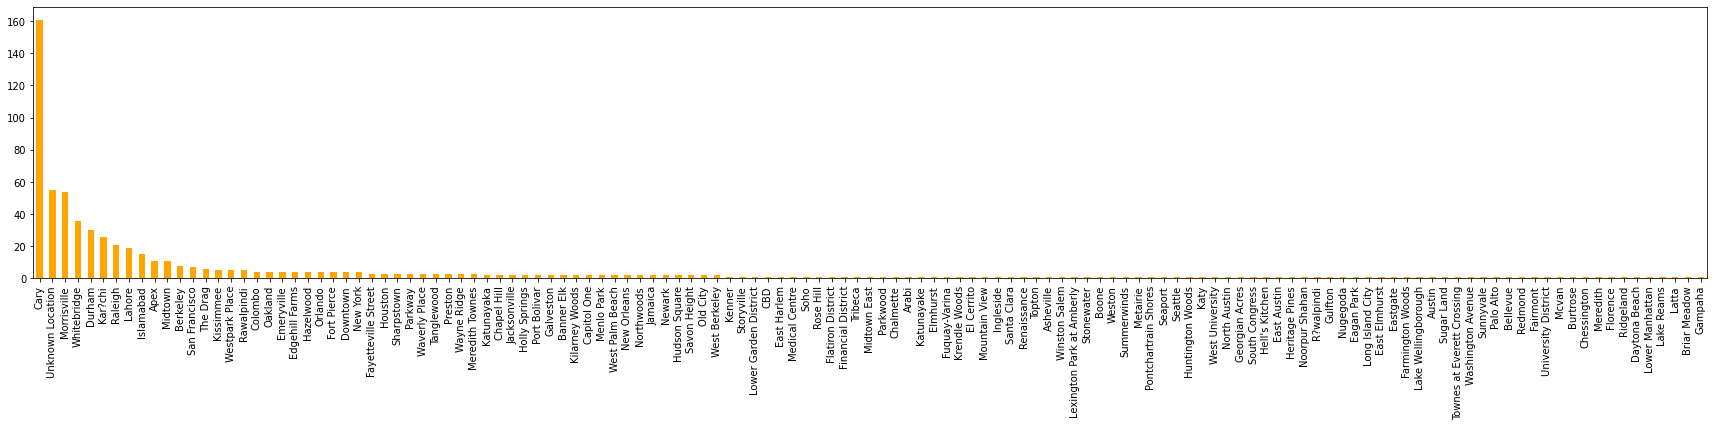

In [ ]:
uber_data['START*'].value_counts().plot(kind = 'bar', figsize = (30,5), color = 'orange') 